#### 00 — Data Check (Guardian DRC)
Quick check of the raw dataset to confirm schema and completeness.

#### Load the dataset

In [2]:
# Import the libraries

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os

RAW = '../data/raw/guardian_drc_2000_2025.csv'

assert os.path.exists(RAW), f'File not found: {RAW}'

# Read the dataset and check the no of columns, rows and nulls
df = pd.read_csv(RAW)
print('Shape:', df.shape)
display(df.head(2))
print('Columns:', list(df.columns))
print('Nulls per column:\n', df.isna().sum())


Shape: (11497, 15)


,pub_date,section_name,headline,standfirst,trailText,bodyText,wordcount,byline,web_url,api_url,is_live,month_start,month_end,page_index,domain
0,2000-01-08T01:33:31Z,Books,Diary: We've been to the Dome and we're believers,NaN,<p>Disaster watch | More trouble with cyclists...,"I took my family to the Dome this week (yes, w...",1201,Simon Hoggart,https://www.theguardian.com/books/2000/jan/08/...,https://content.guardianapis.com/books/2000/ja...,NaN,2000-01-01,2000-01-31,1,theguardian.com
1,2000-01-14T03:47:30Z,Global,Would you really rather live in Ludwigshafen t...,"Well, according to a new survey, you would. O...",There's nothing playing at Ludwigshafen's Pfal...,There's nothing playing at Ludwigshafen's Pfal...,1082,NaN,https://www.theguardian.com/theguardian/2000/j...,https://content.guardianapis.com/theguardian/2...,NaN,2000-01-01,2000-01-31,1,theguardian.com


Columns: ['pub_date', 'section_name', 'headline', 'standfirst', 'trailText', 'bodyText', 'wordcount', 'byline', 'web_url', 'api_url', 'is_live', 'month_start', 'month_end', 'page_index', 'domain']
Nulls per column:
 pub_date            0
section_name        0
headline            0
standfirst       1378
trailText           9
bodyText          138
wordcount           0
byline            747
web_url             0
api_url             0
is_live         11497
month_start         0
month_end           0
page_index          0
domain              0
dtype: int64


The dataset contains articles download from The Guardian Newspaper, covering DRC Congo from 2000 to 2025. The dataset has 11,497 rows and 12 columns. There are few columns with missing values such as the standfirst, trailtext, bodytext, byline. is_live column has all null values. This dictionary defines the columns used in The Guardian newspaper dataset, detailing their contents, data type, and use for analysis (particularly in relation to the influence of media coverage on crisis funding).
| Column Name   | Description                                                                 | Data Type          | Notes/Example Values                                                                                      |
|---------------|-----------------------------------------------------------------------------|--------------------|------------------------------------------------------------------------------------------------------------|
| `pub_date`    | The date and time the article was originally published.                     | Date/Time          | E.g., 2024-03-15T10:30:00Z. Essential for time-series analysis.                                           |
| `section_name`| The section or category of The Guardian the article belongs to.             | String/Categorical | E.g., 'World news', 'Sport', 'Opinion', 'Technology'.                                                     |
| `headline`    | The main title of the news article.                                         | String             | Unique identifier of the article's topic.                                                                 |
| `standfirst`  | A short, secondary line of text, often a summary or hook under the headline.| String             | Often missing (NaN or empty) if the article doesn't use one.                                              |
| `trailText`   | A short snippet used in listings or previews to encourage clicks.           | String             | Very few missing values, as it's key for site navigation.                                                 |
| `bodyText`    | The complete full text of the news article.                                 | String             | Primary content for NLP/Topic Modeling. Missing values usually indicate an incomplete record.             |
| `wordcount`   | The total number of words in the article's main body text.                  | Integer            | A useful measure of the article's depth and prominence.                                                   |
| `byline`      | The name(s) of the journalist(s) who wrote the article.                     | String             | Can be missing if the article is uncredited (e.g., a short agency wire report).                           |
| `web_url`     | The direct URL of the published article.                                    | String             | Unique identifier for linking to the live content.                                                        |
| `api_url`     | The API endpoint URL used to retrieve the full article data.                | String             | Used for re-fetching or verifying the data record.                                                        |
| `is_live`     | A boolean flag indicating if the article is currently live.                 | Boolean/Binary     | E.g., True (or 1) / False (or 0). Mostly False in your sample, suggesting many articles might be archived.|
| `month_start` | Start of the month the article was published in.                            | Date/Time          | Useful for grouping articles into monthly batches for aggregation.                                        |
| `month_end`   | End of the month the article was published in.                              | Date/Time          | Similar to month_start, used for easy month-based filtering.                                              |
| `page_index`  | The page number from the API query where the article record was found.      | Integer            | Useful for tracking the data retrieval process.                                                           |
| `domain`      | The web domain from which the article originates.                           | String             | E.g., theguardian.com. Useful for confirming the source.                                                  |


#### Time Distribution and Coverage
Here we check the number of articles published per year

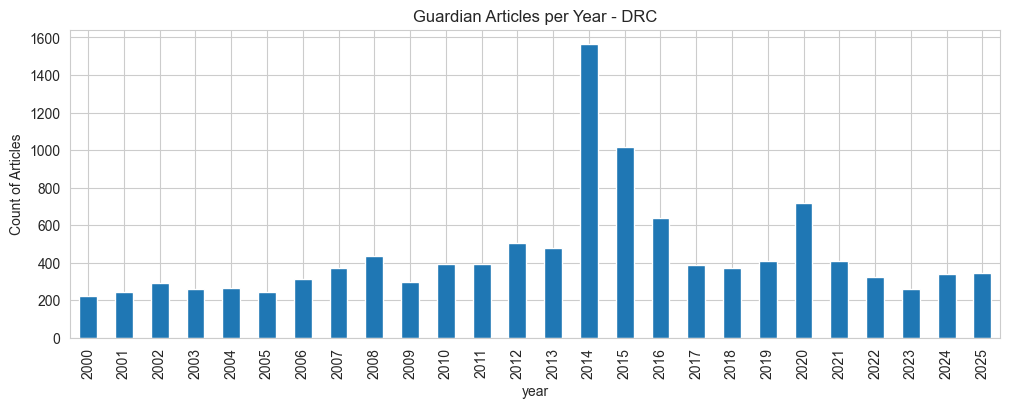

In [4]:
# Time distribution by year
sns.set_style('whitegrid')

df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df = df.dropna(subset=['pub_date'])
df['year'] = df['pub_date'].dt.year

plt.figure(figsize=(12,4))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Guardian Articles per Year - DRC')
plt.ylabel('Count of Articles')
plt.show()


What do the spikes in the years coincide with?

#### Dataset Summary

In [5]:
print("Date range:", df['pub_date'].min(), "→", df['pub_date'].max())
print("Distinct sections:", df['section_name'].nunique())
print(df['section_name'].value_counts().head(10))

Date range: 2000-01-08 01:33:31+00:00 → 2025-10-30 11:52:38+00:00
Distinct sections: 67
section_name
World news            2986
Global development    1306
Opinion                919
Football               904
Environment            462
Music                  398
US news                380
Business               368
UK news                314
Society                289
Name: count, dtype: int64
